In [2]:
import os 
os.chdir('../../')
print("Current working directory is now: ", os.getcwd())

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

Current working directory is now:  C:\Users\Caroline Wang\OneDrive\Duke\Criminal Recidivism\psa-analysis


#### Read in fairness data

In [7]:
# read in fairness data for all problems 
two_year_data = {}
for problem in ['drug', 'felony', 'general', 'misdemeanor', 'property', 'violent']:
    problem_path = "broward/logs/fairness_results/two-year/" + problem
    # walk through the problem folder for the corresponding fairness results for all models
    for _, _, files in os.walk(problem_path):
        for model_csv_name in files:
            model_name = model_csv_name.split("_")[0]
            two_year_data["_".join((problem, model_name))] = pd.read_csv(problem_path + "/" + model_csv_name)

two_year_data.keys()

dict_keys(['drug_cart', 'drug_ebm', 'drug_riskslim', 'drug_stumps', 'felony_cart', 'felony_ebm', 'felony_riskslim', 'felony_stumps', 'general_cart', 'general_ebm', 'general_riskslim', 'general_stumps', 'misdemeanor_cart', 'misdemeanor_ebm', 'misdemeanor_riskslim', 'misdemeanor_stumps', 'property_cart', 'property_ebm', 'property_riskslim', 'property_stumps', 'violent_cart', 'violent_ebm', 'violent_riskslim', 'violent_stumps'])

In [10]:
# read in AUCs and base rates for all predictions problems 



,Attribute,Attribute Value,PPV,FPR,FNR,Accuracy,Treatment Equality,Individuals Evaluated On,fold_num
0,race,African-American,NaN,0.0,1.0,0.875000,inf,224,0
1,race,African-American,NaN,0.0,1.0,0.896104,inf,231,1
2,race,African-American,NaN,0.0,1.0,0.885845,inf,219,2
3,race,African-American,NaN,0.0,1.0,0.891304,inf,230,3
4,race,African-American,NaN,0.0,1.0,0.895455,inf,220,4
5,race,Asian,NaN,0.0,NaN,1.000000,NaN,1,0
6,race,Asian,NaN,0.0,NaN,1.000000,NaN,2,1
7,race,Asian,NaN,0.0,NaN,1.000000,NaN,1,3
8,race,Asian,NaN,0.0,NaN,1.000000,NaN,1,4
9,race,Caucasian,NaN,0.0,1.0,0.925000,inf,120,0


#### Equalized Odds Visualization 

In [76]:
# print(two_year_data['drug_cart'].columns)
equalized_odds_data = two_year_data['drug_cart'][["Attribute", "Attribute Value", "FPR", "FNR", "Individuals Evaluated On", "fold_num"]]

# TODO: put individuals in underrepresented groups into other later
equalized_odds_data = equalized_odds_data[(equalized_odds_data["Attribute Value"] != "Asian") & (equalized_odds_data["Attribute Value"] != "Native American")]
equalized_odds_data = equalized_odds_data.fillna(0)

# TODO: Figure out where all the NaNs come from
equalized_odds_data

,Attribute,Attribute Value,FPR,FNR,Individuals Evaluated On,fold_num
0,race,African-American,0.000000,1.0,217,0
1,race,African-American,0.010101,1.0,231,1
2,race,African-American,0.005076,1.0,217,2
3,race,African-American,0.000000,1.0,227,3
4,race,African-American,0.000000,1.0,232,4
7,race,Caucasian,0.000000,1.0,131,0
8,race,Caucasian,0.009901,1.0,109,1
9,race,Caucasian,0.000000,1.0,123,2
10,race,Caucasian,0.000000,1.0,125,3
11,race,Caucasian,0.000000,1.0,113,4


In [109]:
# weighted average of the FPR and FNR for each attribute over all folds 
# for name, group in equalized_odds_data.groupby(["Attribute", "Attribute Value"]): 

def summarize_equalized_odds(dfs_dict: dict) -> pd.DataFrame:
    """
    dfs: dictionary where the key is the "<problem_name>_<model_name>", value is the corresponding pandas df
    """
    eq_odds_summaries = {}
    
    # loop over each problem and model
    for df_name, df in dfs_dict.items():
        equalized_odds_data = df[["Attribute", "Attribute Value", "FPR", "FNR", "Individuals Evaluated On", "fold_num"]]

        # TODO: put individuals in underrepresented groups into other later
        equalized_odds_data = equalized_odds_data[(equalized_odds_data["Attribute Value"] != "Asian") & (equalized_odds_data["Attribute Value"] != "Native American")]
        # TODO: Figure out where all the NaNs come from
        equalized_odds_data = equalized_odds_data.fillna(0)

        FPR = equalized_odds_data.groupby(["Attribute", "Attribute Value"]).apply(lambda x: np.average(x["FPR"], weights=x["Individuals Evaluated On"]))
        FNR = equalized_odds_data.groupby(["Attribute", "Attribute Value"]).apply(lambda x: np.average(x["FNR"], weights=x["Individuals Evaluated On"]))
        # TODO: compute the weighted standard deviation 

        summary = (pd.concat((FPR, FNR), axis = 1)
                   .reset_index()
                   .rename({0: "FPR", 
                            1: "FNR"},
                            axis = 1))
        
        eq_odds_summaries[df_name] = summary
    return eq_odds_summaries

eq_odds_summaries = summarize_equalized_odds(two_year_data)

In [133]:
def plot_fpr_fnr(fpr_fnr_summary: pd.DataFrame, 
                 problem_name:str, 
                 model_name:str):
    plt.style.use('ggplot')
    for attribute, df in summary.groupby("Attribute"):
        fig, ax = plt.subplots()    

        width = 0.35
        x = np.arange(len(df['Attribute Value']))
        ax.bar(x - width/2, df["FPR"], width, label = 'FPR')
        rects1= ax.bar(x + width/2, df["FNR"], width, label = 'FNR')
        
#         def autolabel(rects, labels):
#             """Attach a text label above each bar in *rects*, displaying its height."""
#             for i, rect in enumerate(rects):
#                 ax.annotate(str(labels[i]),
#                             xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
#                             xytext=(0, 2),  # 3 points vertical offset
#                             textcoords="offset points",
#                             ha='center', va='bottom')

#         # add text labels of the number of inds
#         autolabel(rects=rects1, labels=list(df["avg_fold_size"]))
        
        # formatting
        ax.set_title(f"FPR and FNR for {model_name} on {problem_name}")
        ax.set_xlabel(f"Atttribute: {attribute}")
        ax.set_xticks(x)
        ax.set_xticklabels(list(df['Attribute Value']))
        ax.legend(loc='best')

        # Todo: save plot 
        # Todo: add info of the balance rate of the problem, AUC
        plt.show()
        plt.close()

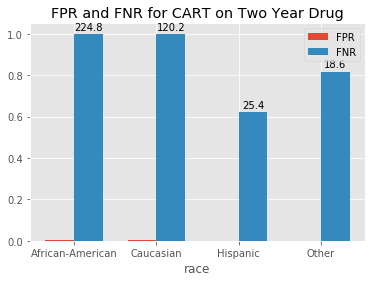

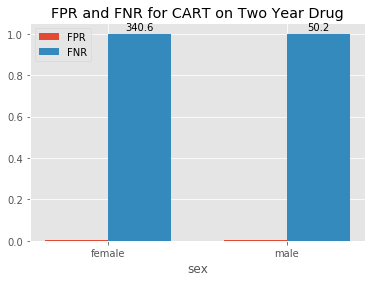

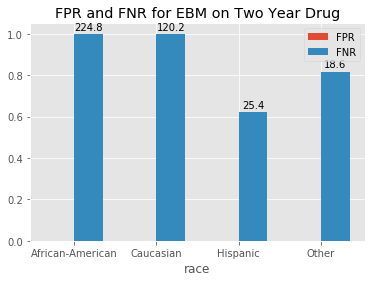

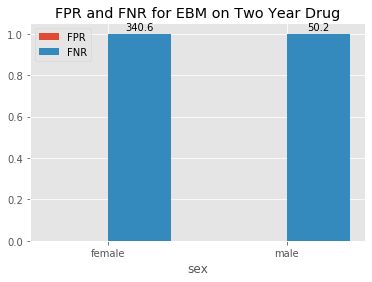

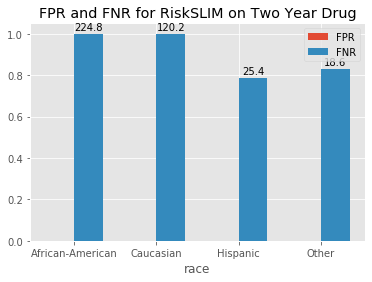

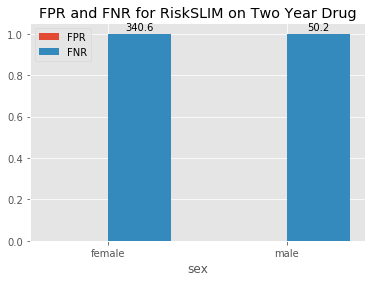

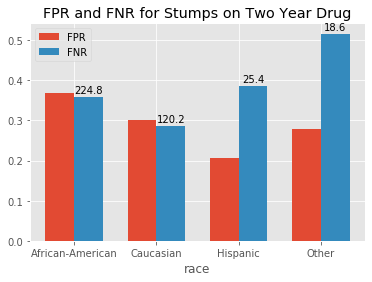

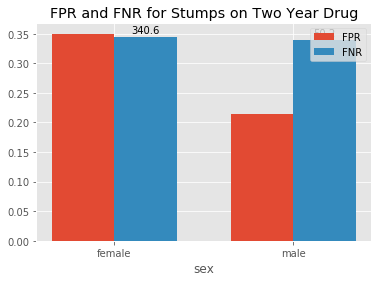

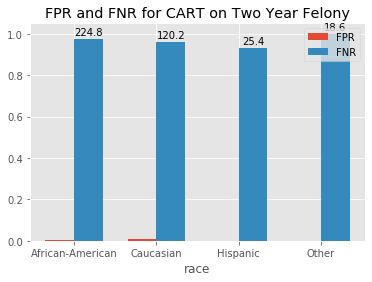

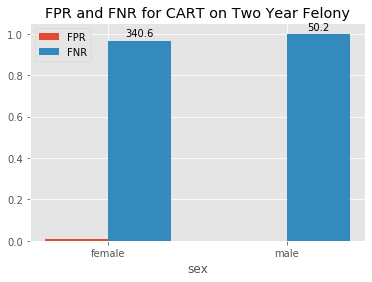

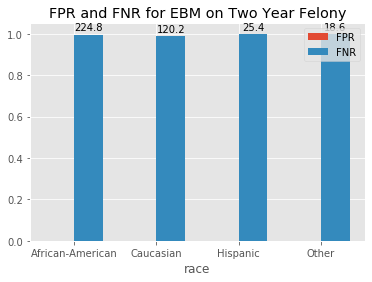

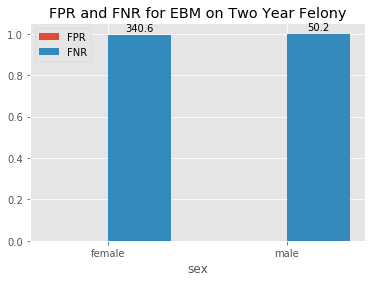

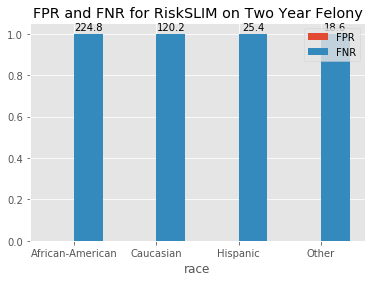

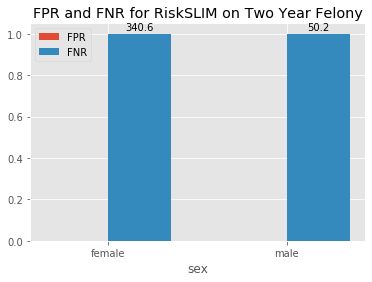

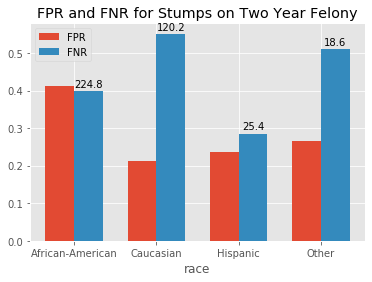

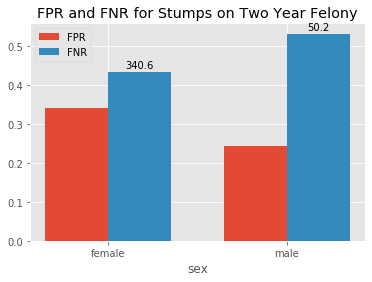

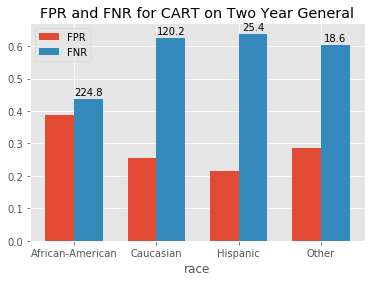

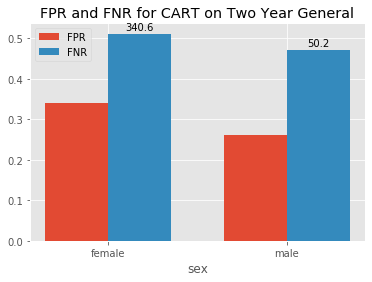

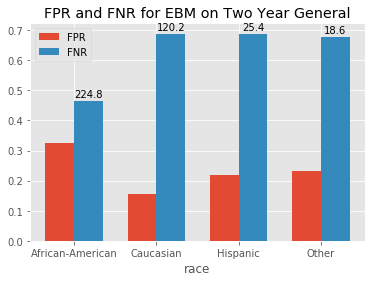

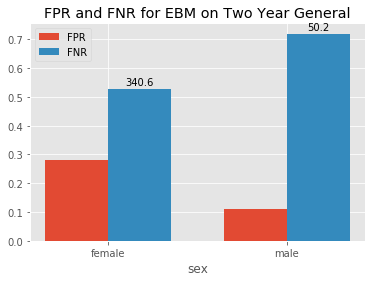

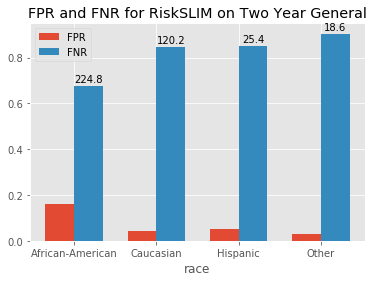

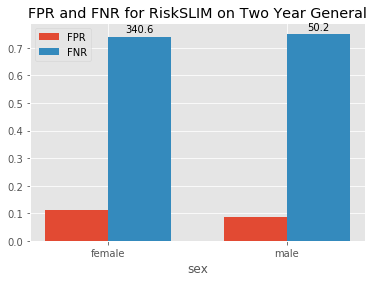

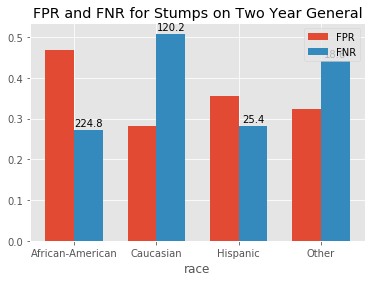

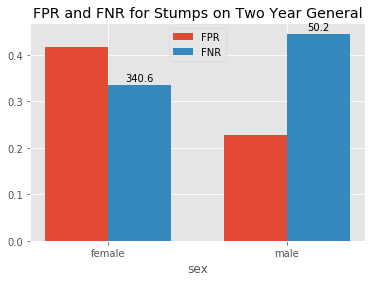

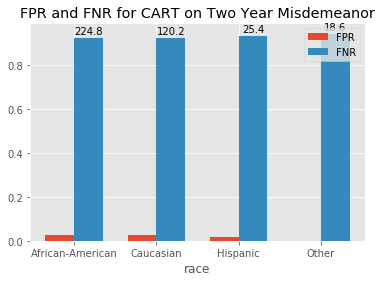

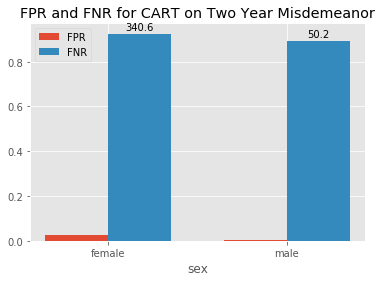

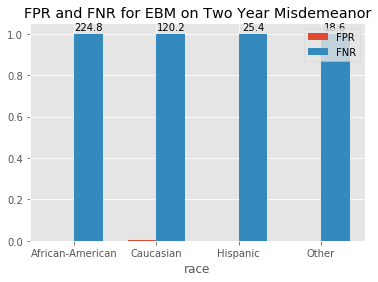

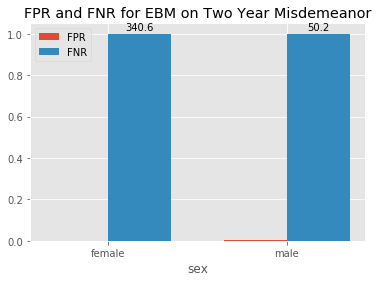

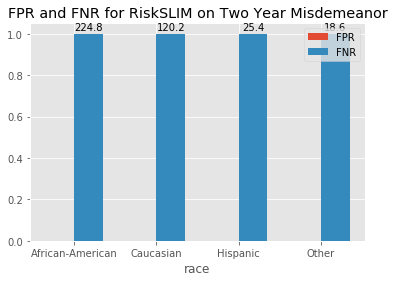

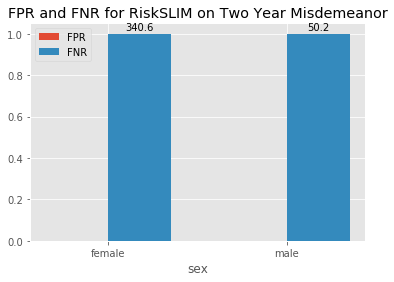

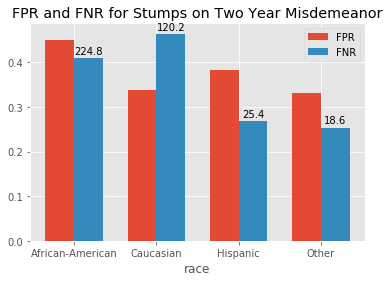

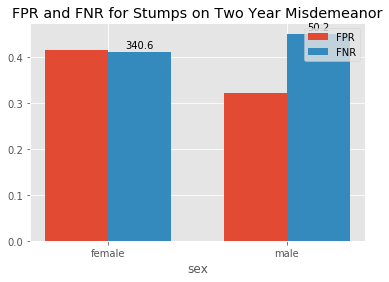

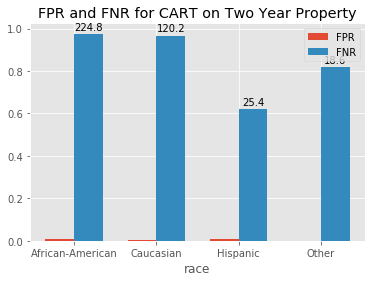

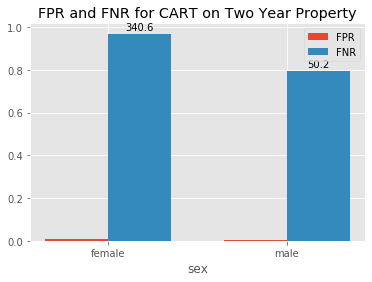

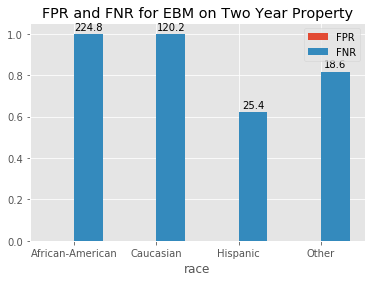

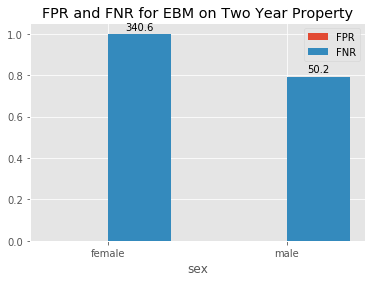

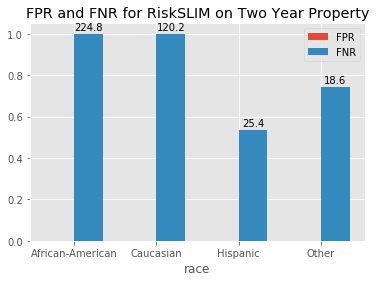

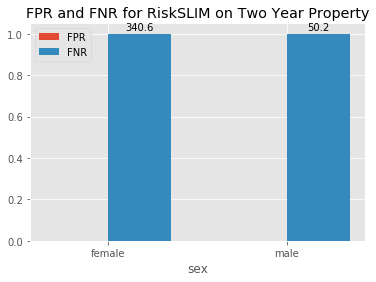

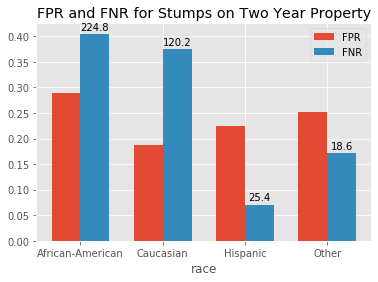

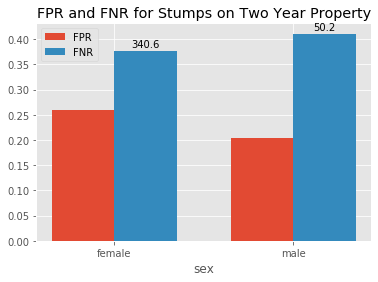

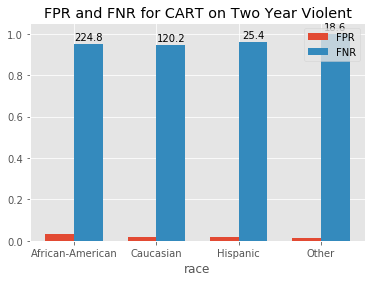

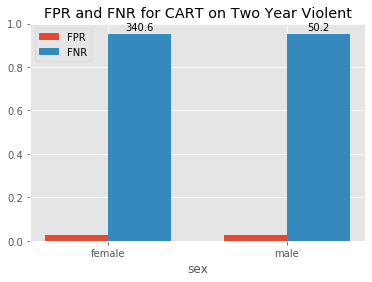

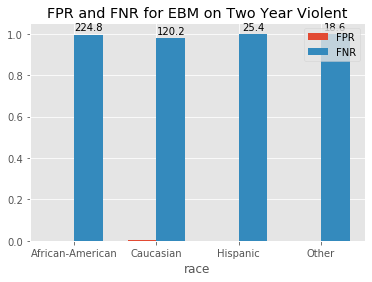

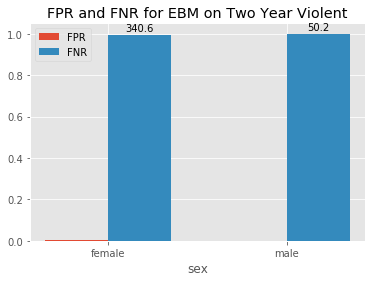

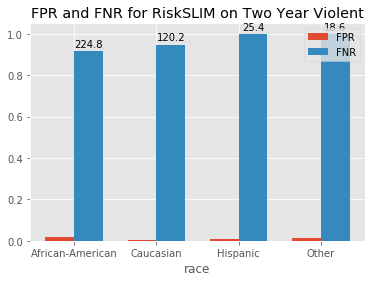

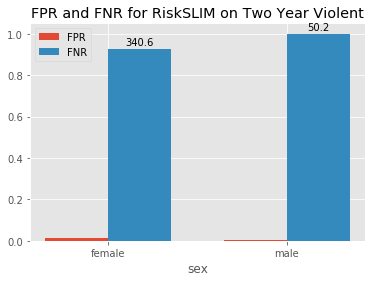

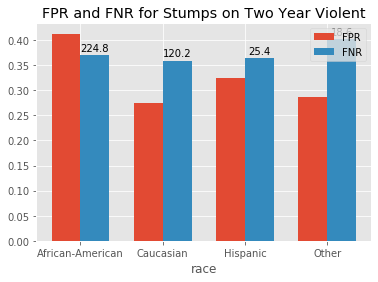

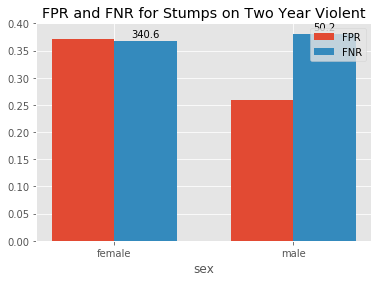

In [135]:
for summary_name, summary in eq_odds_summaries.items():
    problem_name, model_name = summary_name.split("_")

    if model_name == "cart" or model_name == "ebm":
        model_name = model_name.upper()
    elif model_name == "riskslim":
        model_name = "RiskSLIM"
    elif model_name == "stumps": 
        model_name = model_name.capitalize()
        
    plot_fpr_fnr(summary, 
                 problem_name = f"Two Year {problem_name.capitalize()}", 
                 model_name = model_name)

In [138]:
eq_odds_summaries["drug_cart"]

,Attribute,Attribute Value,FPR,FNR,avg_fold_size,sd_fold_size
0,race,African-American,0.003056,1.000000,224.8,6.584831
1,race,Caucasian,0.001796,1.000000,120.2,8.059777
2,race,Hispanic,0.000000,0.622047,25.4,3.322650
3,race,Other,0.000000,0.817204,18.6,1.854724
4,sex,female,0.001974,1.000000,340.6,3.611094
5,sex,male,0.004214,1.000000,50.2,3.600000
